<a target="_blank" href="https://colab.research.google.com/github/taobrienlbl/advanced_earth_science_data_analysis/blob/spring_2023_iub/lessons/11_spectral_analysis_intro/11_workalong_01_fft.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

This notebook explores Fourier transforms and the `numpy.fft` package on some simple examples and realistic problems.

In [1]:
""" Import libraries. """
import numpy as np
import numpy.fft as fft
import matplotlib.pyplot as plt

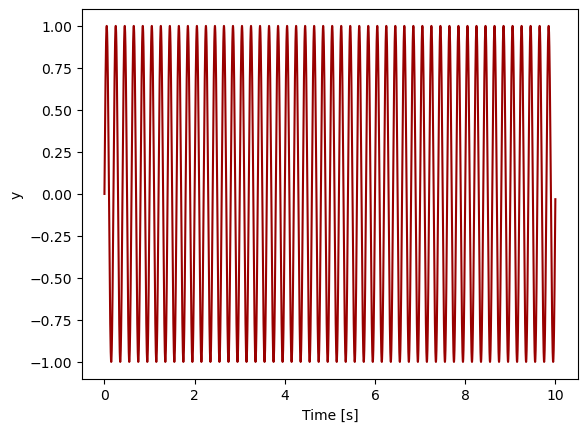

In [2]:
""" Create and plot a test signal. """
freq = 5  # Hz
# create a time variable
dt = 0.001  # seconds
t = np.arange(0, 10, dt)

# create a test signal
y = np.sin(2*np.pi*freq*t)

fig , ax = plt.subplots()
plt.plot(t, y, color='#990000')
ax.set_xlabel("Time [s]")
ax.set_ylabel("y")
plt.show()

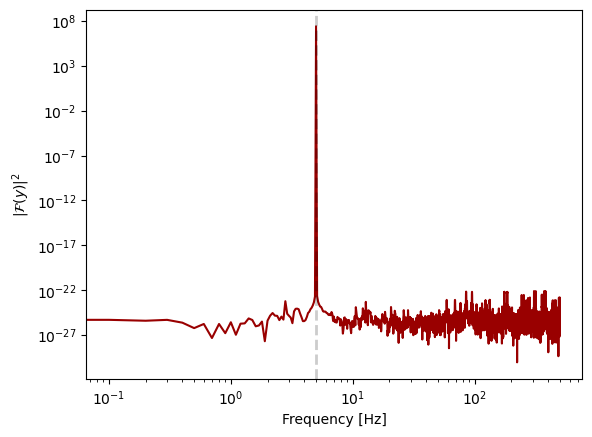

In [3]:
""" Compute the FFT of the test signal. """
y_fft = fft.rfft(y)

# compute the power spectrum from the fft
y_power = np.abs(y_fft)**2

# get the frequencies
freqs = fft.rfftfreq(len(y), dt)

# plot the power frequencies
fig , ax = plt.subplots()
plt.plot(freqs, y_power, color='#990000')
ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel("Frequency [Hz]")
ax.set_ylabel("$|\mathcal{F}(y)|^2$")


# plot a line at the known frequency of the test signal
ax.axvline(freq, color='black', linestyle='--', alpha=0.2, linewidth=2)
plt.show()

In [4]:
""" Make a function to compute the power spectrum of a signal. """

def power_spectrum(y, t):
    """ Compute the power spectrum of a signal. Returns frequencies and the power spectrum: freqs, y_power """
    y_fft = fft.rfft(y)
    # compute the power spectrum from the fft
    y_power = np.abs(y_fft)**2
    # calculate dt
    dt = t[1] - t[0]
    # get the frequencies
    freqs = fft.rfftfreq(len(y), dt)
    
    return freqs, y_power


# also make a function for plotting
def plot_power_spectrum(freqs, y_power):
    """ Plots the power spectrum of a signal.  Returns the figure and axes: fig, ax """
    fig , ax = plt.subplots()
    plt.plot(freqs, y_power, color='#990000')
    
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel("Frequency [Hz]")
    ax.set_ylabel("$|\mathcal{F}(y)|^2$")
    """ correction: plt.show() should not be add here but at the very end after all plotting"""
    # plt.show()
    return fig, ax


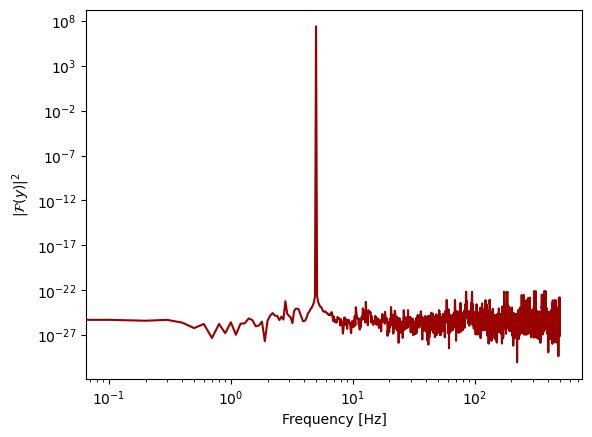

In [5]:
# test functions
freqs, y_power = power_spectrum(y, t)
fig, ax = plot_power_spectrum(freqs, y_power)
plt.show()

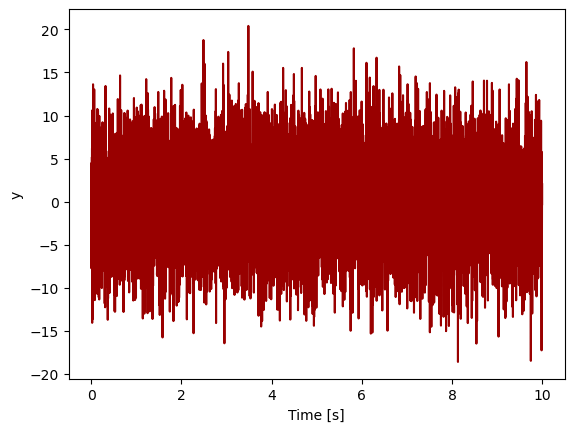

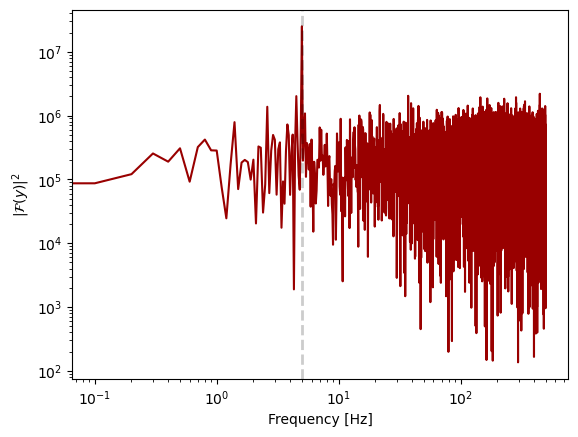

In [6]:
""" Get the power spectrum with noise added. """
y_noise = y + np.random.normal(0, 5, len(y))

# plot the noisy signal
fig, ax = plt.subplots()
plt.plot(t, y_noise, color='#990000')
ax.set_xlabel("Time [s]")
ax.set_ylabel("y")
plt.show()

# plot the power spectrum of noisy signal
freqs, y_power = power_spectrum(y_noise, t)
fig, ax = plot_power_spectrum(freqs, y_power)
# plot a line at the known frequency of the noisy signal
ax.axvline(freq, color="black", linestyle="--", alpha=0.2, linewidth=2)

plt.show()

# Real data

Download this data file: https://github.com/taobrienlbl/advanced_earth_science_data_analysis/blob/spring_2023_iub/lessons/11_spectral_analysis_intro/cannelton_flow.dat

The data file was obtained from https://waterdata.usgs.gov/nwis/dv/?site_no=03303280&PARAmeter_cd=00060 on 11/10/23 at about 11:16 AM Eastern.  It represents daily stream flow from 1975-present at a gauge on the Ohio River in Cannelton, IN

In [7]:
import pandas as pd

In [8]:
""" Load the data file. """
discharge_url = "https://raw.githubusercontent.com/taobrienlbl/advanced_earth_science_data_analysis/spring_2023_iub/lessons/11_spectral_analysis_intro/cannelton_flow.dat"
discharge_df = pd.read_csv(discharge_url, sep= '\t', skiprows=30, header=None, 
                             names = ['agency', 'site', 'date', 'discharge', 'flag'], parse_dates=['date'])
discharge_df.head()

,agency,site,date,discharge,flag
0,USGS,3303280,1975-10-01,94800,A
1,USGS,3303280,1975-10-02,79900,A
2,USGS,3303280,1975-10-03,69000,A
3,USGS,3303280,1975-10-04,74700,A
4,USGS,3303280,1975-10-05,71700,A


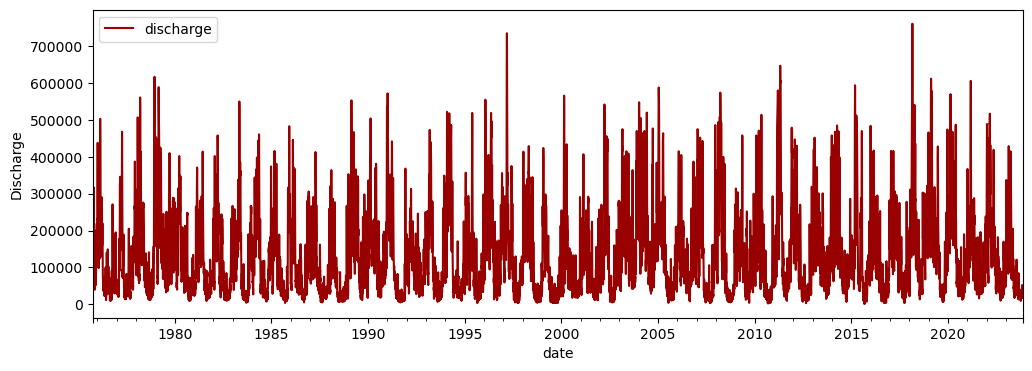

In [9]:
""" Plot a time series of the data. """
fig, ax = plt.subplots(figsize=(12,4))
discharge_df.plot(x='date', y='discharge', ax=ax, color='#990000')
ax.set_ylabel("Discharge")
plt.show()

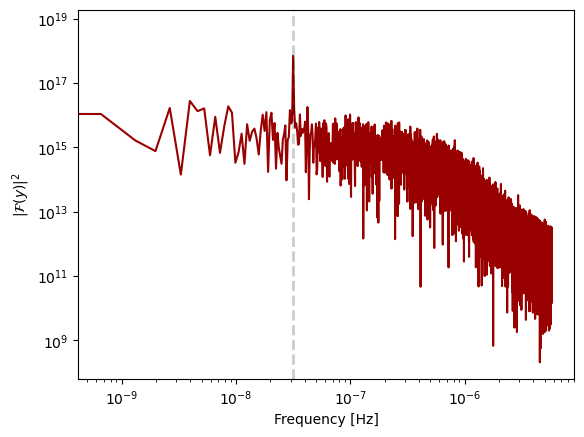

In [10]:
""" Plot the power spectrum of the data. """
# convert date to second
discharge_df['second'] = (discharge_df["date"] - discharge_df["date"][0]).dt.total_seconds()

# compute the power spectrum
discharge_freqs, discharge_power = power_spectrum(discharge_df['discharge'], discharge_df['second'])

# plot the power spectrum
fig, ax = plot_power_spectrum(discharge_freqs, discharge_power)

# plot a line at the yearly frequency
year_period = 1*365.25*24*60*60 # seconds
year_freq = 1/year_period # Hz
ax.axvline(year_freq, color="black", linestyle="--", alpha=0.2, linewidth=2)

plt.show()

C:\Users\CRH\AppData\Local\Temp\ipykernel_34448\3108342322.py:3: RuntimeWarning: divide by zero encountered in divide
  period_years = 1 / (discharge_freqs * (365.25*24*60*60))


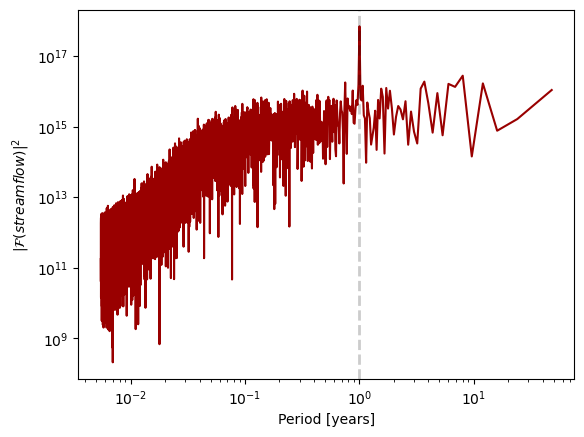

In [11]:
""" Plot the power spectrum of the data with the x-axis as period instead. """
# convert to period by years
period_years = 1 / (discharge_freqs * (365.25*24*60*60))

# plot the power spectrum by period
fig, ax = plt.subplots()
ax.plot(period_years, discharge_power, color = "#990000")

# customize the axis scale and labels
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel("Period [years]")
ax.set_ylabel("$|\mathcal{F}(streamflow)|^2$")

# add a line at 1 year
ax.axvline(1, color="black", linestyle="--", alpha=0.2, linewidth=2)

plt.show()